In [25]:
import os 
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception

In [2]:
# For Colab notebook 

# from google.colab import drive
# drive.mount('/content/drive/')

# paths = glob.glob('path_directory/*')
# l = len('path_directory/')
# labels = []
# for path in paths:
#     labels.append(path[l:])
# print(labels)

In [3]:
# Getting the labels
paths = glob.glob('seg_train/*')
l = len('seg_train/')
labels = []
for path in paths:
    labels.append(path[l:])
print(labels)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [7]:
# Preparing our dataset

def dataset_preparation(path, label):
    X_train=[]
    y_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            X_train.append(img)
            y_train.append(label)
    return np.array(X_train),np.array(y_train)

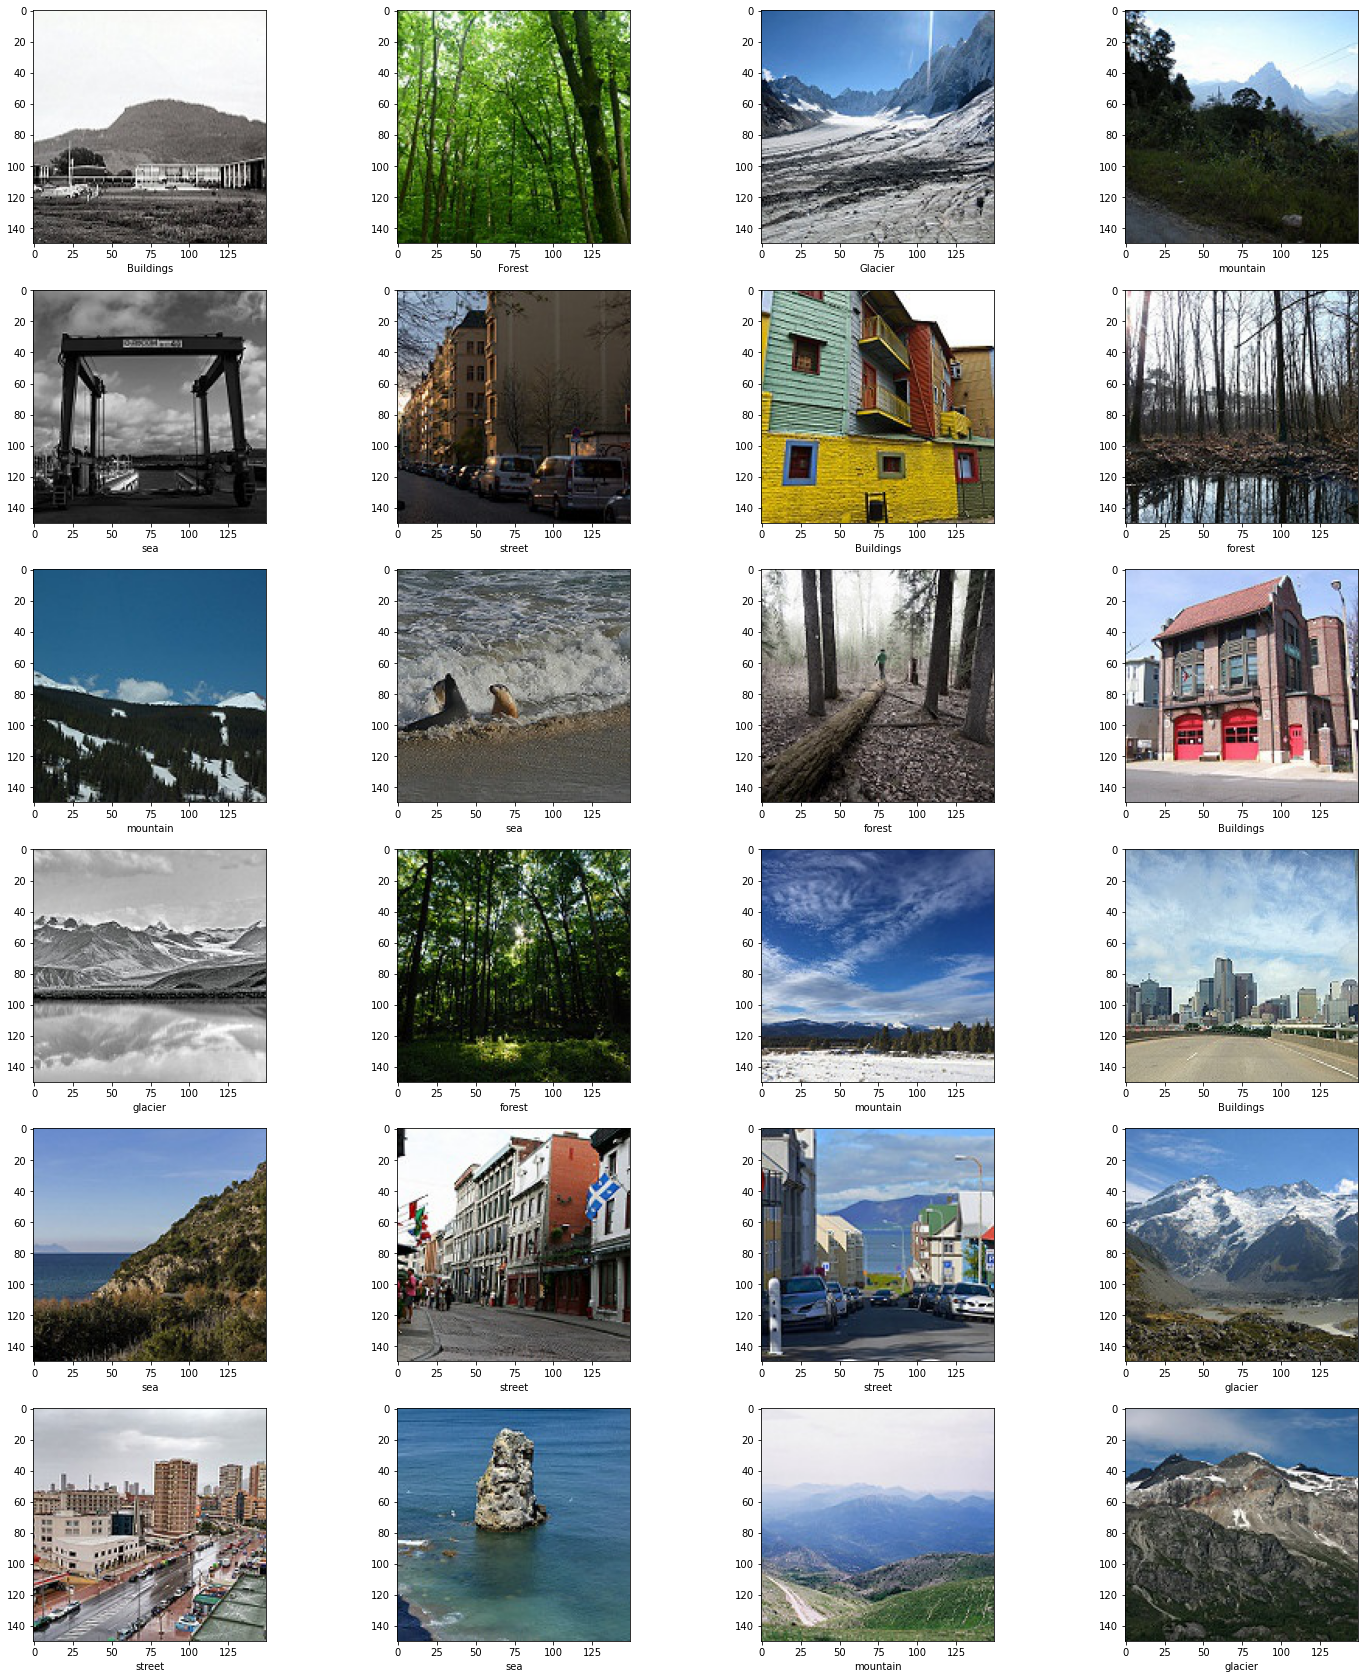

In [5]:
fig = plt.figure(figsize=(25,30))

# Image 1
image1 = load_img('seg_train/buildings/0.jpg')
ax = fig.add_subplot(6, 4, 1)
plt.xlabel('Buildings')
image1_plot = plt.imshow(image1)

# Image 2
image2 = load_img('seg_train/forest/8.jpg')
ax = fig.add_subplot(6, 4, 2)
plt.xlabel('Forest')
image2_plot = plt.imshow(image2)

# Image 3
image3 = load_img('seg_train/glacier/10.jpg')
ax = fig.add_subplot(6, 4, 3)
plt.xlabel('Glacier')
image3_plot = plt.imshow(image3)

# Image 4
image4 = load_img('seg_train/mountain/16.jpg')
ax = fig.add_subplot(6, 4, 4)
plt.xlabel('mountain')
image4_plot = plt.imshow(image4)

# Image 5
image5 = load_img('seg_train/sea/1.jpg')
ax = fig.add_subplot(6, 4, 5)
plt.xlabel('sea')
image5_plot = plt.imshow(image5)

# Image 6
image6 = load_img('seg_train/street/2.jpg')
ax = fig.add_subplot(6, 4, 6)
plt.xlabel('street')
image6_plot = plt.imshow(image6)

# Image 7
image7 = load_img('seg_train/buildings/4.jpg')
ax = fig.add_subplot(6, 4, 7)
plt.xlabel('Buildings')
image7_plot = plt.imshow(image7)

# Image 8
image8 = load_img('seg_train/forest/23.jpg')
ax = fig.add_subplot(6, 4, 8)
plt.xlabel('forest')
image8_plot = plt.imshow(image8)

# Image 9
image9 = load_img('seg_train/mountain/17.jpg')
ax = fig.add_subplot(6, 4, 9)
plt.xlabel('mountain')
image9_plot = plt.imshow(image9)

# Image 10
image10 = load_img('seg_train/sea/21.jpg')
ax = fig.add_subplot(6, 4, 10)
plt.xlabel('sea')
image10_plot = plt.imshow(image10)

# Image 11
image11 = load_img('seg_train/forest/170.jpg')
ax = fig.add_subplot(6, 4, 11)
plt.xlabel('forest')
image11_plot = plt.imshow(image11)

# Image 12
image12 = load_img('seg_train/buildings/142.jpg')
ax = fig.add_subplot(6, 4, 12)
plt.xlabel('Buildings')
image12_plot = plt.imshow(image12)

# Image 13
image13 = load_img('seg_train/glacier/40.jpg')
ax = fig.add_subplot(6, 4, 13)
plt.xlabel('glacier')
image13_plot = plt.imshow(image13)

# Image 14
image14 = load_img('seg_train/forest/175.jpg')
ax = fig.add_subplot(6, 4, 14)
plt.xlabel('forest')
image14_plot = plt.imshow(image14)

# Image 15
image15 = load_img('seg_train/mountain/32.jpg')
ax = fig.add_subplot(6, 4, 15)
plt.xlabel('mountain')
image15_plot = plt.imshow(image15)

# Image 16
image16 = load_img('seg_train/buildings/256.jpg')
ax = fig.add_subplot(6, 4, 16)
plt.xlabel('Buildings')
image16_plot = plt.imshow(image16)

# Image 17
image17 = load_img('seg_train/sea/27.jpg')
ax = fig.add_subplot(6, 4, 17)
plt.xlabel('sea')
image17_plot = plt.imshow(image17)

# Image 18
image18 = load_img('seg_train/street/9.jpg')
ax = fig.add_subplot(6, 4, 18)
plt.xlabel('street')
image18_plot = plt.imshow(image18)

# Image 19
image19 = load_img('seg_train/street/12.jpg')
ax = fig.add_subplot(6, 4, 19)
plt.xlabel('street')
image19_plot = plt.imshow(image19)

# Image 20
image20 = load_img('seg_train/glacier/60.jpg')
ax = fig.add_subplot(6, 4, 20)
plt.xlabel('glacier')
image20_plot = plt.imshow(image20)

# Image 21
image21 = load_img('seg_train/street/19.jpg')
ax = fig.add_subplot(6, 4, 21)
plt.xlabel('street')
image21_plot = plt.imshow(image21)

# Image 22
image22 = load_img('seg_train/sea/20.jpg')
ax = fig.add_subplot(6, 4, 22)
plt.xlabel('sea')
image1_plot = plt.imshow(image22)

# Image 23
image23 = load_img('seg_train/mountain/34.jpg')
ax = fig.add_subplot(6, 4, 23)
plt.xlabel('mountain')
image23_plot = plt.imshow(image23)

# Image 24
image24 = load_img('seg_train/glacier/100.jpg')
ax = fig.add_subplot(6, 4, 24)
plt.xlabel('glacier')
image24_plot = plt.imshow(image24)

## Preparing Training and Testing Data

In [9]:
trainX_building, trainY_building = dataset_preparation('seg_train/buildings/', 0)
trainX_forest, trainY_forest = dataset_preparation('seg_train/forest/', 1)
trainX_glacier, trainY_glacier = dataset_preparation('seg_train/glacier/', 2)
trainX_mountain, trainY_mountain = dataset_preparation('seg_train/mountain/', 3)
trainX_sea, trainY_sea = dataset_preparation('seg_train/sea/', 4)
trainX_street, trainY_street = dataset_preparation('seg_train/street/', 5)

print("Shape of training data of Buildings ", trainX_building.shape, trainY_building.shape)
print("Shape of training data of Forest", trainX_forest.shape, trainY_forest.shape)
print("Shape of training data of Glacier ", trainX_glacier.shape, trainY_glacier.shape)
print("Shape of training data of Mountain ", trainX_mountain.shape, trainY_mountain.shape)
print("Shape of training data of Sea ", trainX_sea.shape, trainY_sea.shape)
print("Shape of training data of Street ", trainX_building.shape, trainY_building.shape)

Shape of training data of Buildings  (2191, 150, 150, 3) (2191,)
Shape of training data of Forest (2271, 150, 150, 3) (2271,)
Shape of training data of Glacier  (2404, 150, 150, 3) (2404,)
Shape of training data of Mountain  (2512, 150, 150, 3) (2512,)
Shape of training data of Sea  (2274, 150, 150, 3) (2274,)
Shape of training data of Street  (2191, 150, 150, 3) (2191,)


In [11]:
x_train = np.concatenate((trainX_building, trainX_forest, trainX_glacier, trainX_mountain, trainX_sea, 
                        trainX_street), axis=0)
y_train = np.concatenate((trainY_building, trainY_forest, trainY_glacier, trainY_mountain, trainY_sea, 
                        trainY_street), axis=0)

In [12]:
print(x_train.shape)
print(y_train.shape)

(14034, 150, 150, 3)
(14034,)


In [13]:
img_aug_tr = ImageDataGenerator(rescale = 1.0/255)
train_gen = img_aug_tr.flow_from_directory('seg_train/', target_size=(150,150),
                                          class_mode = 'categorical',
                                          batch_size = 16)

Found 14034 images belonging to 6 classes.


In [14]:
testX_building, testY_building = dataset_preparation('seg_test/buildings/', 0)
testX_forest, testY_forest = dataset_preparation('seg_test/forest/', 1)
testX_glacier, testY_glacier = dataset_preparation('seg_test/glacier/', 2)
testX_mountain, testY_mountain = dataset_preparation('seg_test/mountain/', 3)
testX_sea, testY_sea = dataset_preparation('seg_test/sea/', 4)
testX_street, testY_street = dataset_preparation('seg_test/street/', 5)

print("Shape of testing data of Buildings ", testX_building.shape, testY_building.shape)
print("Shape of testing data of Forest", testX_forest.shape, testY_forest.shape)
print("Shape of testing data of Glacier ", testX_glacier.shape, testY_glacier.shape)
print("Shape of testing data of Mountain ", testX_mountain.shape, testY_mountain.shape)
print("Shape of testing data of Sea ", testX_sea.shape, testY_sea.shape)
print("Shape of testing data of Street ", testX_building.shape, testY_building.shape)

Shape of testing data of Buildings  (437, 150, 150, 3) (437,)
Shape of testing data of Forest (474, 150, 150, 3) (474,)
Shape of testing data of Glacier  (553, 150, 150, 3) (553,)
Shape of testing data of Mountain  (525, 150, 150, 3) (525,)
Shape of testing data of Sea  (510, 150, 150, 3) (510,)
Shape of testing data of Street  (437, 150, 150, 3) (437,)


In [15]:
x_test = np.concatenate((testX_building,testX_forest,testX_glacier,testX_mountain,testX_sea,
                        testX_street), axis=0)
y_test = np.concatenate((testY_building,testY_forest,testY_glacier,testY_mountain,testY_sea,
                        testY_street), axis=0)

In [16]:
print(x_test.shape)
print(y_test.shape)

(3000, 150, 150, 3)
(3000,)


In [17]:
img_aug_test = ImageDataGenerator(rescale = 1.0/255)
test_gen = img_aug_test.flow_from_directory('seg_test/',
                                           target_size=(150,150),
                                           class_mode = 'categorical',
                                           batch_size= 16)

Found 3000 images belonging to 6 classes.


# Training the dataset on Different Models

## 1. CNN Model

In [20]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization_7 (Batc  (None, 148, 148, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 148, 148, 64)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 batch_normalization_8 (Batc  (None, 146, 146, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)      

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
# history = model.fit_generator(train_gen,
#                              epochs=10,
#                              validation_data=test_gen)

## 2. RESNET

In [28]:
pretrained_model2 = ResNet50(input_shape=(150,150,3),
                           include_top=False,
                           weights='imagenet')
pretrained_model2.summary()

In [ ]:
# for layer in pretrained_model2.layers:
#     layer.trainable = False
    
# last_layer = pretrained_model2.get_layer('conv5_block3_out')
# print('last layer of resnet50 : output shape', last_layer.output_shape)
# last_output = last_layer.output


# x = layers.Flatten()(last_output)
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(6, activation='softmax')(x)


# model_resnet = Model(pretrained_model2.input, x)


# model_resnet.compile(optimizer=Adam, loss= 'categorical_crossentropy', 
#                     metrics=['acc'])

# model_resnet.fit_generator(train_gen,
#                           epochs=10,
#                           validation_date=test_gen)

## 3. VGG-16

In [ ]:
pretrained_model3 = VGG16(input_shape=(150,150,3),
                        include_top = False,
                        weights = 'imagenet')
pretrained_model3.summary()

In [ ]:
# for layer in pretrained_model3.layers:
#     layer.trainable = False
    
# last_layer = pretrained_model3.get_layer('conv5_block3_out')
# print('last layer of vgg : output shape', last_layer.output_shape)
# last_output = last_layer.output


# x = layers.Flatten()(last_output)
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(6, activation='softmax')(x)


# model_vgg = Model(pretrained_model3.input, x)


# model_vgg.compile(optimizer=Adam, loss= 'categorical_crossentropy', 
#                     metrics=['acc'])

# model_vgg.fit_generator(train_gen,
#                           epochs=10,
#                           validation_date=test_gen)

## 4. INCEPTION V3

In [ ]:
pretrained_model4 = InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                              weights= 'imagenet')
pretrained_model4.summary()

In [ ]:
# for layer in pretrained_model4.layers:
#     layer.trainable = False
    
# last_layer = pretrained_model4.get_layer('conv5_block3_out')
# print('last layer of inceptionv3 : output shape', last_layer.output_shape)
# last_output = last_layer.output


# x = layers.Flatten()(last_output)
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(6, activation='softmax')(x)


# model_inceptionv3 = Model(pretrained_model4.input, x)


# model_inceptionv3.compile(optimizer=Adam, loss= 'categorical_crossentropy', 
#                     metrics=['acc'])

# model_inceptionv3.fit_generator(train_gen,
#                           epochs=10,
#                           validation_date=test_gen)

## 5. XCEPTION V3

In [ ]:
pretrained_model5 = Xceptionv3(input_shape=(150,150,3),
                              include_top= False,
                              weights= 'imagenet')
pretrained_model5.summary()

In [ ]:
# for layer in pretrained_model5.layers:
#     layer.trainable = False
    
# last_layer = pretrained_model5.get_layer('conv5_block3_out')
# print('last layer of xceptionv3 : output shape', last_layer.output_shape)
# last_output = last_layer.output


# x = layers.Flatten()(last_output)
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(6, activation='softmax')(x)


# model_xceptionv3 = Model(pretrained_model5.input, x)


# model_xceptionv3.compile(optimizer=Adam, loss= 'categorical_crossentropy', 
#                     metrics=['acc'])

# model_xceptionv3.fit_generator(train_gen,
#                           epochs=10,
#                           validation_date=test_gen)

### Saving our model

In [ ]:
model.save('image_classification_model.h5')

In [29]:
from PIL import Image

### Sorting the labels

In [30]:
labels = sorted(os.listdir('seg_train/'))

In [31]:
del labels[0]

In [32]:
labels

['forest', 'glacier', 'mountain', 'sea', 'street']

# Testing Our model on New Images

## HI I AM AN ARTIFICIAL
## INTELLIGENCE IMAGE
## DETECTOR MACHINE !!

## I have learned to identify 
## nature's  and man's 
## beautiful creations like
## forests, seas, buildings,
## mountains, glaciers and
## streets.

## JUST ENTER THE IMAGE 
## PATH AND I WILL TELL 
## YOU WHAT IS THERE IN 
## YOUR IMAGE

In [ ]:
print()
print()
print()
img_path = input("Enter IMAGE PATH : ")
img = load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis=0)
x = x/255
category1 = model_xceptionv3.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
fig = plt.figure(figsize=(10,6))
plt.imshow(img)
print()
print()
print("\N{thinking face}"*8)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=35, loc="center",
         backgroundcolor='green', color='white',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, 
          backgroundcolor='red', color='white')